# Removing bad images from images set and get the one time correlation data

In [1]:
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import cm
%matplotlib notebook

import skbeam.core.correlation as corr
import skbeam.core.roi as roi
import skbeam.core.mask as mask

<IPython.core.display.Javascript object>


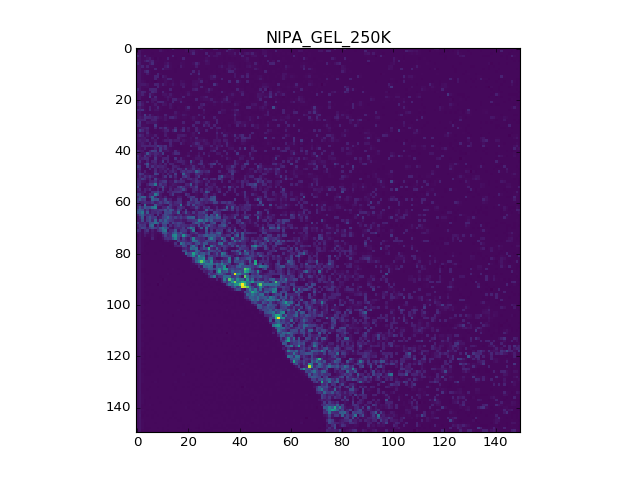

In [2]:
num_levels = 6
num_bufs = 8

# load the data
img_stack = np.load("100_500_NIPA_GEL.npy")
fig, ax = plt.subplots()
# plot the first image to make sure the data loaded correctly
ax.imshow(img_stack[0], cmap='viridis', interpolation='nearest')
ax.set_title("NIPA_GEL_250K")
None

### Get the ROIS

In [3]:
# define the ROIs
roi_start = 65 # in pixels
roi_width = 9 # in pixels
roi_spacing = (5.0, 4.0)
x_center = 7. # in pixels
y_center = (129.) # in pixels
num_rings = 3

# get the edges of the rings
edges = roi.ring_edges(roi_start, width=roi_width, 
                       spacing=roi_spacing, num_rings=num_rings)

# get the label array from the ring shaped 3 region of interests(ROI's)
labeled_roi_array = roi.rings(
    edges, (y_center, x_center), img_stack.shape[1:])


In [4]:
g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, img_stack)

## Introduce the bad images

In [5]:
bad_img_list = [2, 30, 206, 300, 405]   # create bad image list to check the data

In [6]:
imgs = mask.bad_to_nan_gen(img_stack, bad_img_list)

images = []
for result in imgs:
    images.append(result)

##  get the one time correlation when there is bad images

In [7]:
g2_n, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        labeled_roi_array, np.asarray(images))

In [8]:
lag_time = 0.001
lag_step = lag_steps[:g2.shape[0]]
lags = lag_step*lag_time

In [9]:
g2.shape, g2_n.shape

((28, 3), (28, 3))

<IPython.core.display.Javascript object>


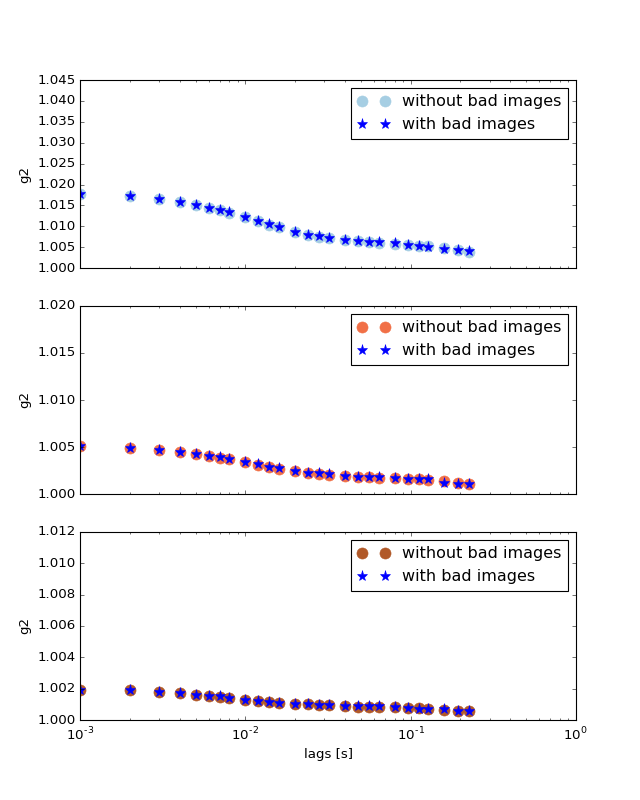

/Users/sameera/mc/envs/py3k/lib/python3.4/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:
/Users/sameera/mc/envs/py3k/lib/python3.4/site-packages/matplotlib/lines.py:1082: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


In [10]:
fig, axes = plt.subplots(num_rings, sharex=True, figsize=(8,10))
axes[-1].set_xlabel("lags [s]")

for ax, roi_color, _g2, g_n in zip(axes, cm.get_cmap('Paired')(np.linspace(0, 1, 3)), g2.T, g2_n.T):
    ax.set_ylabel("g2") 
    ax.semilogx(lags, _g2, 'o', markerfacecolor=roi_color, markersize=10, markeredgecolor=roi_color,
                label="without bad images")
    ax.semilogx(lags, g_n, '*', markerfacecolor="b", markersize=10, markeredgecolor="b", label="with bad images")
    ax.legend()

In [11]:
import skbeam

In [12]:
skbeam.__version__

'0.0.6+34.g73ae7f1'